<a href="https://colab.research.google.com/github/bintangcahyaaa/TubesSKO_JohnMacChesney/blob/main/Mencari_Nilai_Kurva_LPB_%26_RTB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUBES SKO Kelompok JohnMacChesney
1. Tegar Jati Samudra  (1101194087)
2. Bintang Cahya Anwar (1101194194)
3. Mahendra Yurnell    (1101194139)

In [1]:
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#-- Kabel FO G.655
L=np.arange(1,20.0,1) #km
haspel = 3 #km
dispersi_material = 23e-12 #s/km.nm
alpha_f = 0.60 #dB/km

In [3]:
#-- Pengirim
ptx = 8 #mW
ptx_db = 10*log10(ptx)
spektral = 0.1 #nm
t_tx = 35e-12 #s
mod_NRZ = 0.7 #NRZ
mod_RZ = 0.35 #RZ
bitrate = 2.5e9 #2.5 Gbps
tb = 1/bitrate #timebit(1 bit butuh berapa waktu utk dikirimkan)

In [4]:
#-- Pengirim
sensitivitas = -29 #dBm
t_rx = 35e-12 #s

In [5]:
#-- Redaman Kanal
n_c = 2 #jumlah redaman
alpha_c = 0.19 #tiap ada titik konektor meredam 0.1 db/detik
n_splice = (L/haspel)-1
alpha_splice = 2.5 #db/titik redaman per titik
ms = 4 #db >> biaya tak terduga pada redaman(db) biasanya 2x lipat

In [6]:
alpha_t = n_c*alpha_c+n_splice*alpha_splice+L*alpha_f+ms
#print("Redaman Kabel : ",alpha_t,"dB")

In [7]:
prx = ptx_db - alpha_t

In [8]:
prx

array([ 5.71756654e+00,  4.28423320e+00,  2.85089987e+00,  1.41756654e+00,
       -1.57667967e-02, -1.44910013e+00, -2.88243346e+00, -4.31576680e+00,
       -5.74910013e+00, -7.18243346e+00, -8.61576680e+00, -1.00491001e+01,
       -1.14824335e+01, -1.29157668e+01, -1.43491001e+01, -1.57824335e+01,
       -1.72157668e+01, -1.86491001e+01, -2.00824335e+01])

In [9]:
t_mat = dispersi_material*L*spektral
t_wg = 0 #diabaikan
t_mod = 0 #dianggap menggunakan kabel SM

t_sys = np.sqrt(t_tx**2+
             t_mat**2+
             t_mod**2+
             t_wg**2+
             t_rx**2)
t_sys

array([4.95508829e-11, 4.97107634e-11, 4.99760943e-11, 5.03452083e-11,
       5.08158440e-11, 5.13852119e-11, 5.20500720e-11, 5.28068177e-11,
       5.36515610e-11, 5.45802162e-11, 5.55885780e-11, 5.66723919e-11,
       5.78274156e-11, 5.90494708e-11, 6.03344843e-11, 6.16785214e-11,
       6.30778091e-11, 6.45287533e-11, 6.60279486e-11])

Text(0.5, 1.0, 'Kurva Power Link Budget')

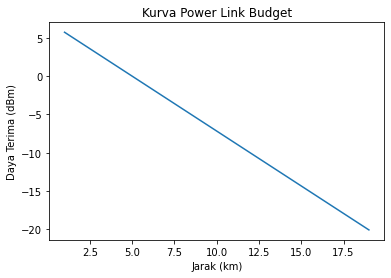

In [10]:
plt.plot(L,prx)
plt.xlabel("Jarak (km)")
plt.ylabel("Daya Terima (dBm)")
plt.title("Kurva Power Link Budget")

Text(0.5, 1.0, 'Kurva Rise Time Budget')

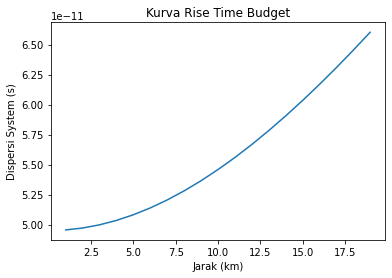

In [11]:
plt.plot(L,t_sys)
plt.xlabel("Jarak (km)")
plt.ylabel("Dispersi System (s)")
plt.title("Kurva Rise Time Budget")